# LAB ASSIGNMENT 8

**Name:** SHUBHADIP CHAKRABARTI

**Registration Number:** 19BAI1113

**Objectives:**

    1. To Explore the application of Fourier Transformations on the Medical Image
    2. Implementation of Fourier Transform using Numpy and OpenCV Libraries

**Image**: Retina Image

## Introduction

The Fourier Transform is basically used to decompose an image into its sine and cosine components. It is noted that the output of the transformation represents the image in frequency domain, while the input image is the spatial domain equivalent.

### Importing Necessary Modules and Functions

In [1]:
#import open CV
import cv2

#import numpy
import numpy as np

#import pandas
import pandas as pd

#import matplotlib for plotting the images
import matplotlib.pyplot as plt

#import scikit-image for image operations
from skimage import io, color

### Loading Image into the Python Notebook

Text(0.5, 1.0, 'Original Image in BGR configuration')

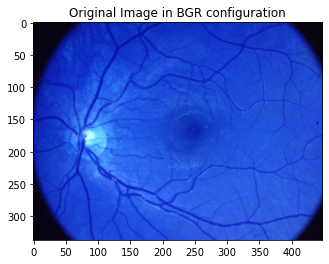

In [2]:
# Load the input image
original_image = cv2.imread('normal-fundus.png')
plt.imshow(original_image)
plt.title("Original Image in BGR configuration")

We note that the image is obtained in BGR configuration.

We now convert the BGR Configured Image to Gray Scale Image.

### Conversion of BGR Image to Gray Scale Image

Text(0.5, 1.0, 'Gray Scale View')

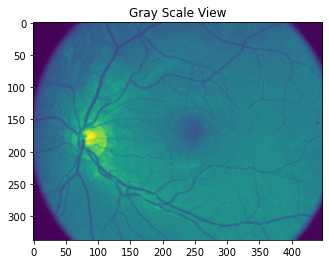

In [3]:
#convert to Gray Scale Image
image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
plt.imshow(image)
plt.title("Gray Scale View")

We could successfully obtain the Gray Scaled Image from the Original Color Image.

We now apply the Transformation Techniques on the Gray Scale Image. 

We first apply Transformation using Numpy

## Transformation using Numpy

## Fourier Transformation

Numpy has an FFT package to perform the Fourier Transformation on the input Medical Image. Upon successful application of the FFT package on the input image, we obtain an image whose DC component will be at the top left corner. Hence, we use np.fft.fftshift() to shift the component to the center of the image. Once the frequency component is determined, we calculate the magnitude spectrum. 

In [4]:
#perform frequency transform
f = np.fft.fft2(image)

In [5]:
#shift the DC Component
fshift = np.fft.fftshift(f)

In [6]:
#Determine the Magnitude Spectrum
magnitude_spectrum = 20*np.log(np.abs(fshift))

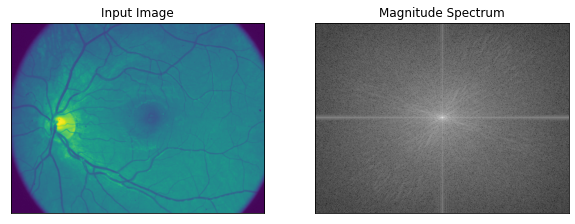

In [7]:
#Plotting of the Images
plt.figure(figsize=(10,10))

#Input Image
plt.subplot(121),plt.imshow(image)
plt.title('Input Image'), plt.xticks([]), plt.yticks([])

#Transformed Image
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])

plt.show()

### Inference

We have successfully implemented Fourier Transform on the given Medical Image.

The presence of a relatively more brighter spot at the center of the resultant image indicates the presence of higher concentration of low frequency contents.

We now aim to implement Inverse Fourier Transform on the above obtained output image. 

## Inverse Fourier Transformation

We now apply high pass filters on the image and thereafter recontruct the image. We do so by initially removing the low frequencies by using a rectangular mask window of size 60x60. We then apply the inverse shift using fft.ifftshift() on the image so that DC component again comes back to the top-left corner. Then we finally find the inverse FFT using ifft2() function. It is noted that the result obtained would be complex, hence we extract only the real part of the result and display it.

In [8]:
#Define Mask
rows, cols = image.shape
crow,ccol = rows//2 , cols//2
fshift[crow-30:crow+31, ccol-30:ccol+31] = 0

In [9]:
#Inverse Shift and Inverse Transform
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.real(img_back)

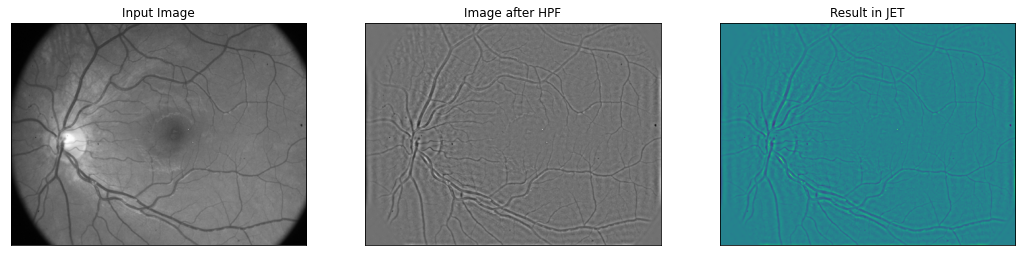

In [10]:
#Plotting of the Images
plt.figure(figsize=(18,18))

#Input Image
plt.subplot(131),plt.imshow(image, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])

plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])

plt.subplot(133),plt.imshow(img_back)
plt.title('Result in JET'), plt.xticks([]), plt.yticks([])

plt.show()

### Inference

We have successfully implemented Inverse Fourier Transform on the Image

High Pass Filtering is basically an edge detection operation. The output obtained shows that most of the image data is present in the Low frequency region of the spectrum. 

We now apply the Fourier Transform using OpenCV Library

## Transformation using OpenCV

## Fourier Transformation

Presence of dft() function in the OpenCV Library enables us to perform the Fourier Transformation on the input Medical Image using OpenCV.

The only difference observed when compared to the earlier method is the usage of two channels in this technique. The First channel will have the real part of the result and second channel will have the imaginary part of the result.

In [11]:
#convert image to float32
img_float32 = np.float32(image)

In [12]:
#Tranformation
dft = cv2.dft(img_float32, flags = cv2.DFT_COMPLEX_OUTPUT)

In [13]:
#Shifts
dft_shift = np.fft.fftshift(dft)

In [14]:
#magnitude spectrum
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

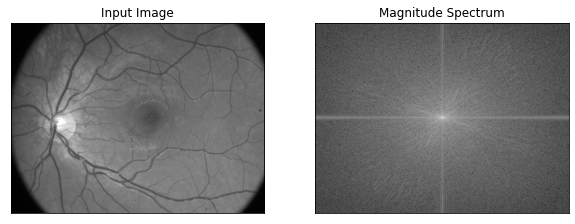

In [15]:
#Plotting of Images
#Input Image
plt.figure(figsize=(10,10))

plt.subplot(121),plt.imshow(image, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])

#Transformed Image
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])

plt.show() 

### Inference

We have successfully implemented Fourier Transform on the given Medical Image.

We now aim to implement Inverse Fourier Transform on the above obtained output image.

## Inverse Fourier Transformation

We now apply low pass filters on the image and thereafter recontruct the image. We use fft.ifftshift() and idft() functions in OpenCV to carry out inverse fourier transformation.

In [16]:
rows, cols = image.shape
crow,ccol = rows//2 , cols//2

In [17]:
# create a mask first, center square is 1, remaining all zeros
mask = np.zeros((rows,cols,2),np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1

In [18]:
# apply mask and inverse DFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

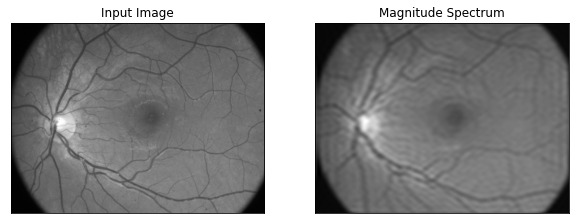

In [19]:
#Plotting of the Images
plt.figure(figsize=(10,10))

#Input Image
plt.subplot(121),plt.imshow(image, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])

plt.show()

### Inference

We have successfully applied Fourier Transform using OpenCV Library

The image reconstructed is based on Low Pass Filters. The improved quality of the obtained image proves that the image data is more concentrated towards lower frequencies.

## Conclusion

We could acheive the following objectives in this exercise: 

    1. We could successfully explore the implementation of Fourier Transformation.
    2. We could successfully implement the Fourier Transform using Numpy and OpenCV 

It is noted that there is not much difference in the output image obtained as a result of Fourier Transform (from both the methods)

It is also noted that the OpenCV functions was faster when compared to its Numpy counterpart operations.

We also tested the application of inverse fourier transforms for gaining better insights to the application of this technique.